たつおプログラミング実習第一回

## 今回の目的：PyTorchを使って、Tensorと仲良くなろう
2019-10-09 たつお
***
### PyTorchとは：Pythonの機械学習向けライブラリ。論文の実装に使われることが多い。もはやPythonライクな別言語。
### Tensorとは：スカラ、ベクトル、行列の一般化表現。


In [ ]:
#公式サイトからコマンドを確認してpipする
#行頭の”!”はLINUXコマンドを認識させるためのプレフィックス
!pip3 install torch==1.2.0+cpu torchvision==0.4.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
#PyTorchをインポート
import torch

In [ ]:
#3*2のテンソル(行列)を生成
x = torch.tensor([[1,2,3],[2,3,4]])
print(x)

In [ ]:
#正規分布からランダムに抽出して3*3*3のテンソルを生成
y = torch.randn(3,3,3)
print(y)

In [ ]:
#リスト内包表記を使ってこんな事もできる
z = torch.tensor([[[i * 10//(k+1) + j*k  for i in range(10)] for j in range(6)]for k in range(3)])
print(z)

In [ ]:
#先程生成したテンソルxを見てみる
#x = torch.tensor([[1,1,1],[1,1,1],[1,1,1]])
print(x)
x.size()

size()は引数なしの状態で全体の大きさを返す
引数を入れるとn番目の軸の大きさを返す

In [ ]:
t = torch.tensor([[[1,2,3],[2,3,4]],[[1,2,3],[2,3,4]]])
print(t.size(0),t.size(1),t.size(2))
print(t.size())

In [ ]:
#テンソル同士の演算も通常に定義される
a = torch.randn(3,3)
b = torch.randn(3,3)
print(str(a) + '　　　a\n---------------------------------------------------------')
print(str(b) + '　　　b\n---------------------------------------------------------')
print(str(a+b) + '　　　和\n---------------------------------------------------------')
print(str(a-b) + '　　　差\n---------------------------------------------------------')
print(str(a*b) + '　　　積\n---------------------------------------------------------')
print(str(torch.add(a,20)) +'　　　ブロードキャスト\n---------------------------------------------------------')

In [ ]:
#行列のドット積
#行列、またはベクトルに対してドット積が定義される
#ドット積は通常、NN内の順伝播アルゴリズムに用いられる
bias = torch.tensor([[1,2,3],[4,5,6]])
_in = torch.tensor([[7],[8],[9]]) 
out  = torch.matmul(bias,_in) #matrix multiple
print(out)

In [ ]:
#行列の転置。引数はテンソル、一つ目の軸、二つ目の軸
#transpose()は見かけを変えただけなので、contiguous()を使ってメモリも並び替える
torch.transpose(out,0,1).contiguous()

In [ ]:
#view()はNumPyのreshape()と似たような挙動をします。
#行列を変形させる
egg = torch.randn(4,3)
hum = torch.transpose(egg,0,1).contiguous().view(-1,2)
print(egg)
print(hum)

In [ ]:
#reshape()もあります
spam = torch.transpose(egg,0,1).reshape(3,4)
print(spam)

In [ ]:
#reshape(),view()に共通する仕様として第ニ引数に'-1'を指定することで、第三引数に合わせた大きさに変形させることができる
egg.reshape(-1,2)

In [ ]:
egg.reshape(-1,6)

In [ ]:
#割り切れないときはエラーを返す
egg.reshape(-1,5)

### 活性化関数
入力を非線形に加工してくれる関数。
ディープがディープである理由でもある。
例として、sigmoid、tanh、ReLUなどがある

In [ ]:
bacon = torch.randn(4)
print(bacon)

In [ ]:
tomato = torch.sigmoid(bacon)
print(tomato)
sausage = torch.tanh(bacon)
print(sausage)
bean = torch.relu(bacon)
print(bean)

### 演習
入力層＋隠れ層(3層)＋出力層　の順伝播アルゴリズムを組め。

ただし、出力層以外の4層にはバイアス項を適用すること。

出力層の活性化関数にはsigmoidを、それ以外にはtanhを用いること。

順伝播の式は　$x_{n+1} = f(x_n \times w + b)$ 

入力は$[1.0,3.0,5.0]^{\mathrm{T}}$とする

$w$ は重み。矢印に当たる。今回はランダムでよい。

$b$ はバイアス。黒丸に当たる。

$f$ は活性化関数。
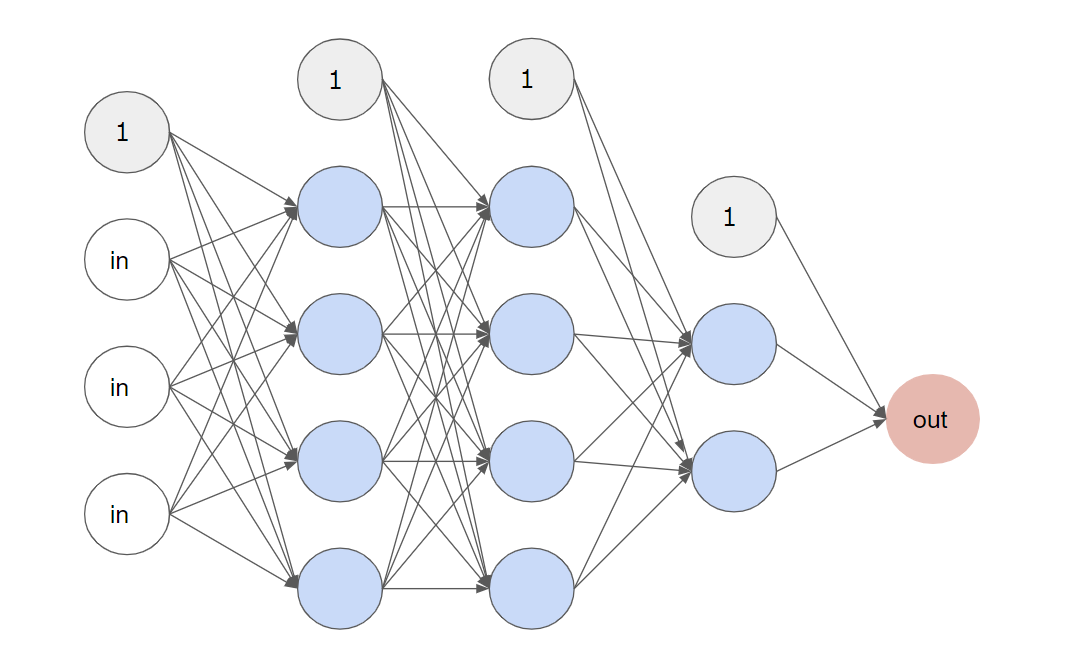